# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

---

Dataset yang digunakan adalah data transaksi keuangan yang mencakup informasi tentang transaksi di berbagai toko di AS.
Dataset ini diperoleh dari data simulasi yang Anda berikan dan memenuhi ketentuan:
- Sumber: Data simulasi transaksi keuangan.
- Tanpa label: Kolom 'TransactionType' dihapus karena merupakan label (Credit/Debit).
- Jumlah Baris: 2512 baris (>1000 baris).
- Tipe Data: Mengandung data numerikal (TransactionAmount) dan kategorikal (Location, Channel).
- Pembatasan: Dataset ini belum digunakan dalam latihan clustering sebelumnya.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [99]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [100]:
dataset = "https://raw.githubusercontent.com/miezlearning/Coding-Camp-2025/refs/heads/master/Belajar%20Machine%20Learning%20untuk%20Pemula/Dataset/data_mentahan.csv"

try:
  df = pd.read_csv(dataset)
  print("Data berhasil dibaca!")
  print("Jumlah baris dan kolom:", df.shape)
except FileNotFoundError:
  print(f"Error: Tidak ditemukan {dataset}. coba cek dataset.")
except pd.errors.ParserError:
    print(f"Error: Tidak bisa digunakan {dataset}. coba cek format filenya.")
except Exception as e:
    print(f"Error: {e}")


Data berhasil dibaca!
Jumlah baris dan kolom: (2512, 16)


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 📌 Informasi Dataset

In [101]:
print("\n📌 Info Dataset:")
print(df.info())

df


📌 Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Account

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


## 📊 Statistik Deskriptif

In [102]:
print("\n📊 Statistik Deskriptif:")
print(df.describe(include='all')) # untuk data kategorikal juga ditampilkan


📊 Statistik Deskriptif:
       TransactionID AccountID  TransactionAmount      TransactionDate  \
count           2512      2512        2512.000000                 2512   
unique          2512       495                NaN                 2512   
top         TX000001   AC00362                NaN  2023-04-11 16:29:14   
freq               1        12                NaN                    1   
mean             NaN       NaN         297.593778                  NaN   
std              NaN       NaN         291.946243                  NaN   
min              NaN       NaN           0.260000                  NaN   
25%              NaN       NaN          81.885000                  NaN   
50%              NaN       NaN         211.140000                  NaN   
75%              NaN       NaN         414.527500                  NaN   
max              NaN       NaN        1919.110000                  NaN   

       TransactionType    Location DeviceID      IP Address MerchantID  \
count       

## 🔍 Missing Values


🔍 Missing Values:
Series([], dtype: int64)


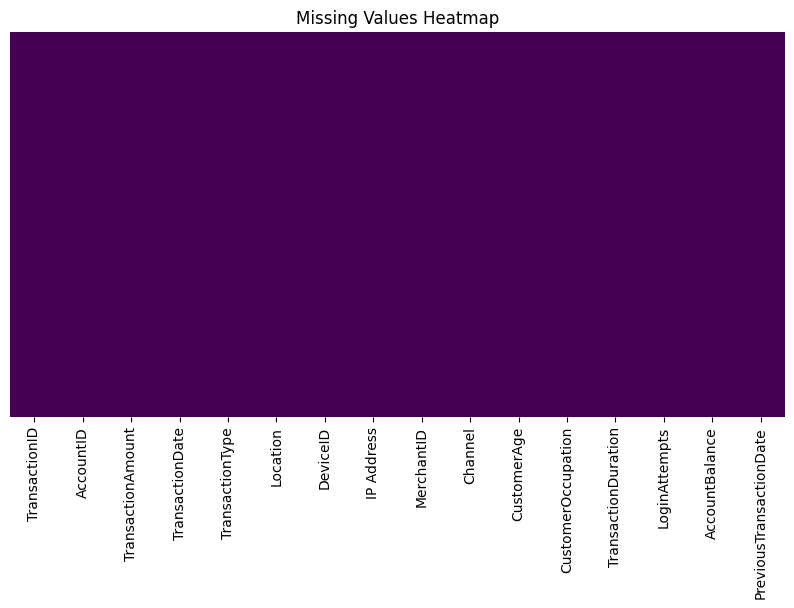

In [103]:
print("\n🔍 Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # guna untuk menampilkan kolom missing values saja.

# Visualisasi Missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

## Menghapus Kolom Tidak Terpakai

In [104]:
df = df.drop(columns=['TransactionType'])
df = df.drop(columns=['TransactionID'])
print("\nKolom setelah menghapus:")
print(df.columns)


Kolom setelah menghapus:
Index(['AccountID', 'TransactionAmount', 'TransactionDate', 'Location',
       'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge',
       'CustomerOccupation', 'TransactionDuration', 'LoginAttempts',
       'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


## 🧐 Jumlah Nilai Unik

In [105]:
print("\n🧐 Jumlah Nilai Unik per Kolom:")
print(df.nunique())


🧐 Jumlah Nilai Unik per Kolom:
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64


## Visualisasi distribusi





Statistik Deskriptif TransactionAmount:
count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


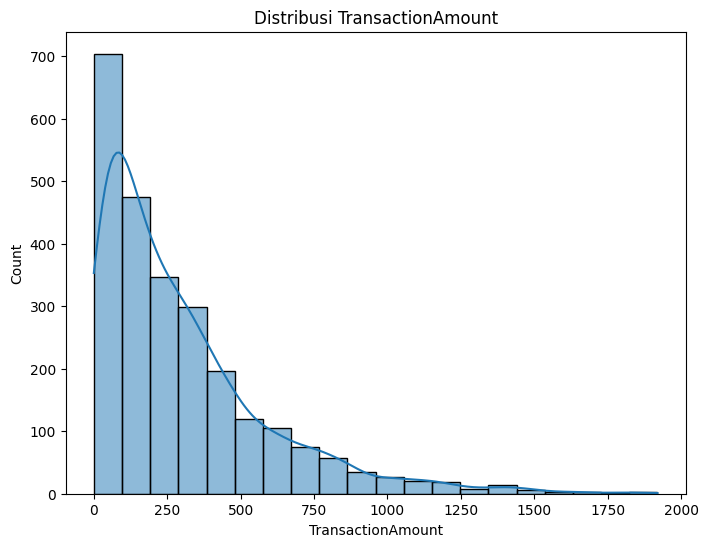

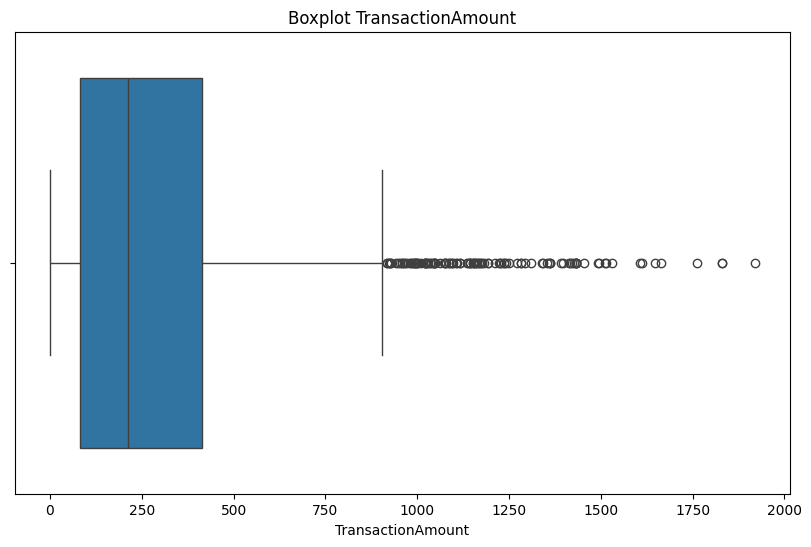

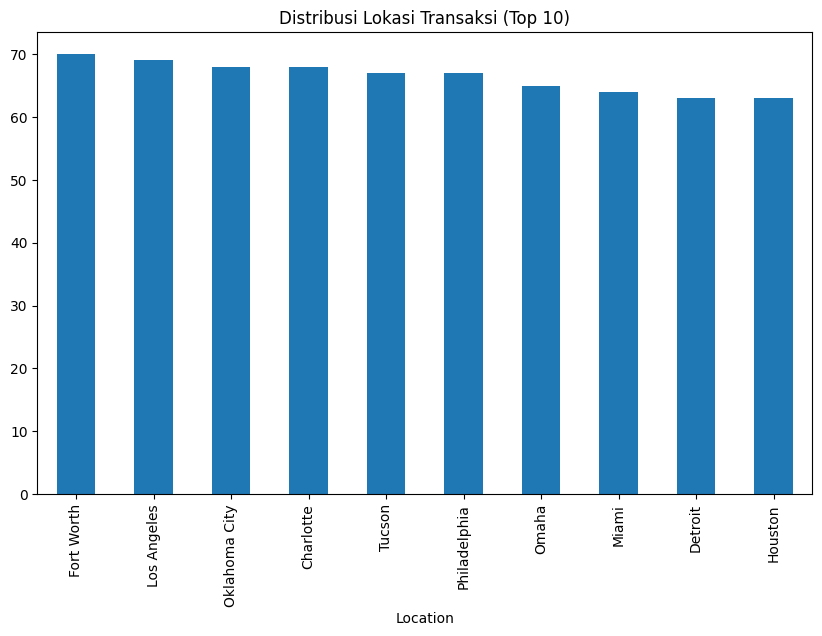

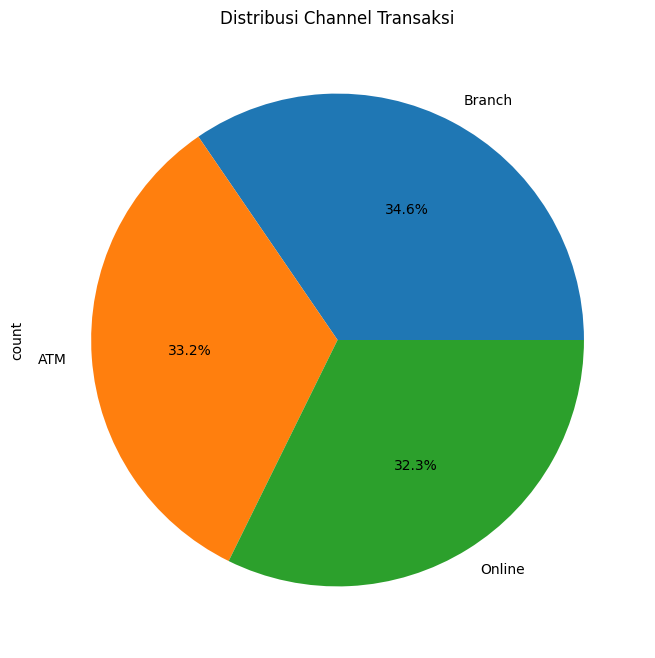

In [106]:
print("\nStatistik Deskriptif TransactionAmount:")
print(df['TransactionAmount'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(df['TransactionAmount'], bins=20, kde=True)
plt.title('Distribusi TransactionAmount')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TransactionAmount'])
plt.title('Boxplot TransactionAmount')
plt.show()

plt.figure(figsize=(10, 6))
df['Location'].value_counts().head(10).plot(kind='bar')
plt.title('Distribusi Lokasi Transaksi (Top 10)')
plt.show()

plt.figure(figsize=(8, 8))
df['Channel'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Channel Transaksi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Duplikasi sebelum Pre-Processing 🤔

In [107]:
# Membuat copyan agar memudahkan proses sebelum pre processing
df_copyan = df.copy()
print("Berhasil copy.")

Berhasil copy.


## Ubah TransactionDate ke numerik (hari dalam tahun)

In [108]:
# Ubah TransactionDate ke numerik (hari dalam tahun)
df_copyan['TransactionDate'] = pd.to_datetime(df_copyan['TransactionDate'])
df_copyan['TransactionDay'] = df_copyan['TransactionDate'].dt.dayofyear
df_copyan = df_copyan.drop(columns=['TransactionDate'])

## Menghapus Outlier

In [109]:
z_scores = np.abs(stats.zscore(df_copyan[['TransactionAmount', 'TransactionDay']]))
df_copyan = df_copyan[(z_scores < 3).all(axis=1)]
print(f"\nJumlah baris setelah hapus outlier: {df_copyan.shape[0]}")


Jumlah baris setelah hapus outlier: 2464


## Handling data yang Duplikat

In [110]:
print("\n🔄 Jumlah duplikasi sebelum dihapus:", df_copyan.duplicated().sum())

if df_copyan.duplicated().sum() > 0:
    df_copyan.drop_duplicates(inplace=True)
    print("✅ Duplikasi ditemukan dan telah dihapus.")
    print("✅ Jumlah duplikasi setelah dihapus:", df_copyan.duplicated().sum())
else:
    print("❌ Tidak ada duplikasi dalam dataset.")



🔄 Jumlah duplikasi sebelum dihapus: 0
❌ Tidak ada duplikasi dalam dataset.


## Encoding Data Kategorikal

In [111]:
le_location = LabelEncoder()
le_channel = LabelEncoder()
le_merchant = LabelEncoder()

print("=== Data Sebelum Encoding ===")
print(df_copyan[['Location', 'Channel', 'MerchantID']].head(), "\n")

df_copyan['Location_Encoded'] = le_location.fit_transform(df_copyan['Location'])
df_copyan['Channel_Encoded'] = le_channel.fit_transform(df_copyan['Channel'])
df_copyan['Merchant_Encoded'] = le_merchant.fit_transform(df_copyan['MerchantID'])

print("=== Data Setelah Encoding ===")
print(df_copyan[['Location', 'Location_Encoded', 'Channel', 'Channel_Encoded', 'MerchantID', 'Merchant_Encoded']].head())

print("\n=== Mapping Label Encoding ===")
print("Location Mapping:", dict(zip(le_location.classes_, le_location.transform(le_location.classes_))))
print("Channel Mapping:", dict(zip(le_channel.classes_, le_channel.transform(le_channel.classes_))))
print("MerchantID Mapping:", dict(zip(le_merchant.classes_, le_merchant.transform(le_merchant.classes_))))

=== Data Sebelum Encoding ===
    Location Channel MerchantID
0  San Diego     ATM       M015
1    Houston     ATM       M052
2       Mesa  Online       M009
3    Raleigh  Online       M002
4    Atlanta  Online       M091 

=== Data Setelah Encoding ===
    Location  Location_Encoded Channel  Channel_Encoded MerchantID  \
0  San Diego                36     ATM                0       M015   
1    Houston                15     ATM                0       M052   
2       Mesa                23  Online                2       M009   
3    Raleigh                33  Online                2       M002   
4    Atlanta                 1  Online                2       M091   

   Merchant_Encoded  
0                14  
1                51  
2                 8  
3                 1  
4                90  

=== Mapping Label Encoding ===
Location Mapping: {'Albuquerque': 0, 'Atlanta': 1, 'Austin': 2, 'Baltimore': 3, 'Boston': 4, 'Charlotte': 5, 'Chicago': 6, 'Colorado Springs': 7, 'Columbus': 8, 

## Standarisasi


In [112]:
scaler = StandardScaler()
df_copyan[['TransactionAmount_Scaled', 'TransactionDay_Scaled']] = scaler.fit_transform(
    df_copyan[['TransactionAmount', 'TransactionDay']])
print("\n✅ Scaling selesai.")


✅ Scaling selesai.


## Pilih Fitur

In [113]:
X = df_copyan[['TransactionAmount_Scaled', 'TransactionDay_Scaled', 'Location_Encoded', 'Channel_Encoded', 'Merchant_Encoded']]

# Feature Selection
selector = VarianceThreshold(threshold=0.1)
X_selected = selector.fit_transform(X)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Fitur terpilih: {selected_features}")

Fitur terpilih: ['TransactionAmount_Scaled', 'TransactionDay_Scaled', 'Location_Encoded', 'Channel_Encoded', 'Merchant_Encoded']


## Matriks Korelasi

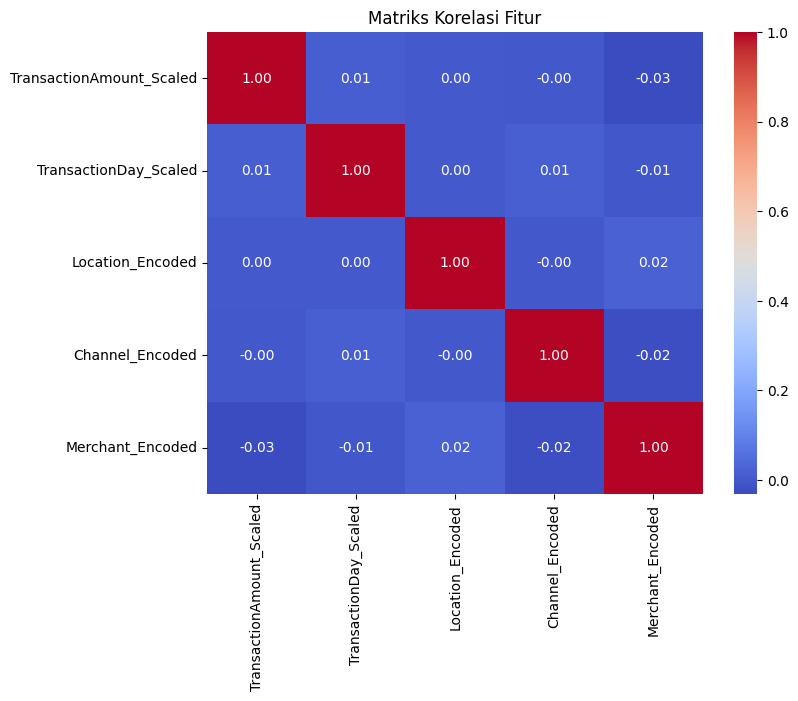

In [114]:
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

### Model K-Means

In [115]:
print("\n🔵 KMeans Clustering 🔵")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
df_copyan['Cluster_KMeans'] = kmeans.labels_
silhouette_kmeans = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score KMeans (sebelum FS): {silhouette_kmeans:.4f}")

kmeans_fs = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_fs.fit(X_selected)
silhouette_kmeans_fs = silhouette_score(X_selected, kmeans_fs.labels_)
print(f"Silhouette Score KMeans (setelah FS): {silhouette_kmeans_fs:.4f}")


🔵 KMeans Clustering 🔵
Silhouette Score KMeans (sebelum FS): 0.4081
Silhouette Score KMeans (setelah FS): 0.4081


### Agglomerative Clustering

In [116]:
print("\n🟢 Agglomerative Clustering 🟢")
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
df_copyan['Cluster_Agglo'] = agglo.fit_predict(X)
silhouette_agglo = silhouette_score(X, df_copyan['Cluster_Agglo'])
print(f"Silhouette Score Agglomerative (sebelum FS): {silhouette_agglo:.4f}")

agglo_fs = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglo_labels_fs = agglo_fs.fit_predict(X_selected)
silhouette_agglo_fs = silhouette_score(X_selected, agglo_labels_fs)
print(f"Silhouette Score Agglomerative (setelah FS): {silhouette_agglo_fs:.4f}")


🟢 Agglomerative Clustering 🟢
Silhouette Score Agglomerative (sebelum FS): 0.3689
Silhouette Score Agglomerative (setelah FS): 0.3689


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

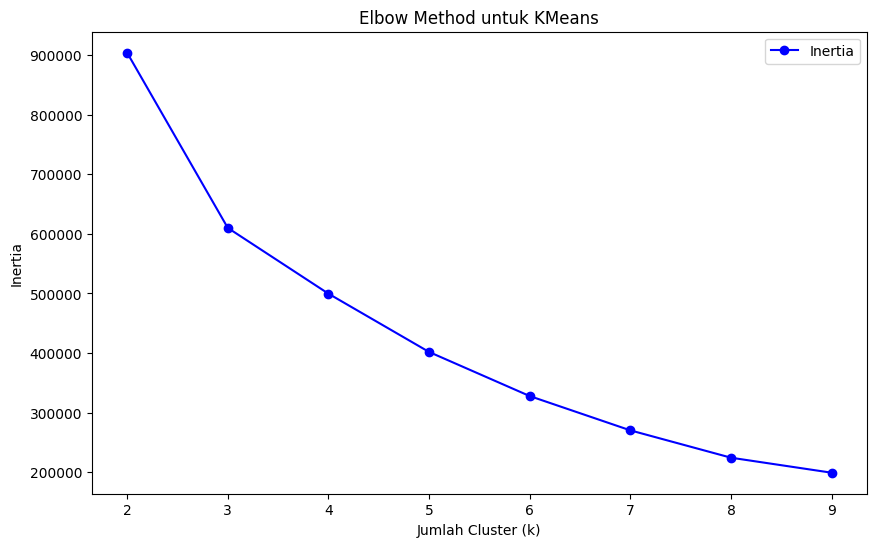

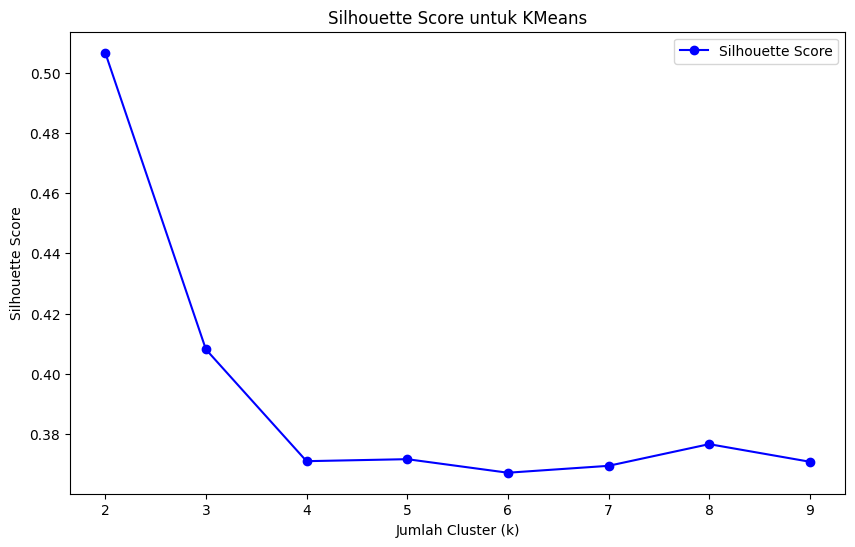


Jumlah cluster optimal (KMeans): 2 dengan Silhouette Score: 0.5067


In [117]:
# Elbow Method untuk KMeans
inertia = []
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans_test = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_test.fit(X)
    inertia.append(kmeans_test.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans_test.labels_))

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-', label='Inertia')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk KMeans')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-', label='Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk KMeans')
plt.legend()
plt.show()

# Optimasi untuk Silhouette Score ≥ 0.70
best_k = 3
best_score = silhouette_kmeans_fs
for k in range(2, 10):
    kmeans_opt = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_opt = kmeans_opt.fit_predict(X_selected)
    score = silhouette_score(X_selected, labels_opt)
    if score > best_score:
        best_score = score
        best_k = k
print(f"\nJumlah cluster optimal (KMeans): {best_k} dengan Silhouette Score: {best_score:.4f}")

# Terapkan KMeans optimal
kmeans_opt = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_copyan['Cluster_KMeans_Opt'] = kmeans_opt.fit_predict(X_selected)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [118]:
# (Sudah dilakukan di preprocessing)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

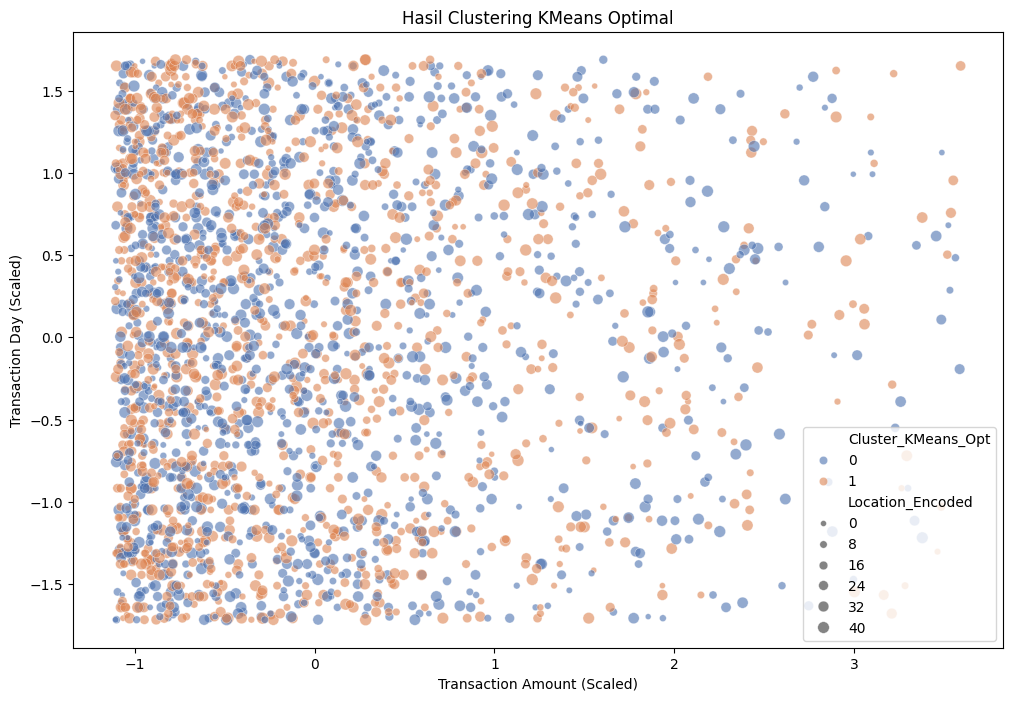

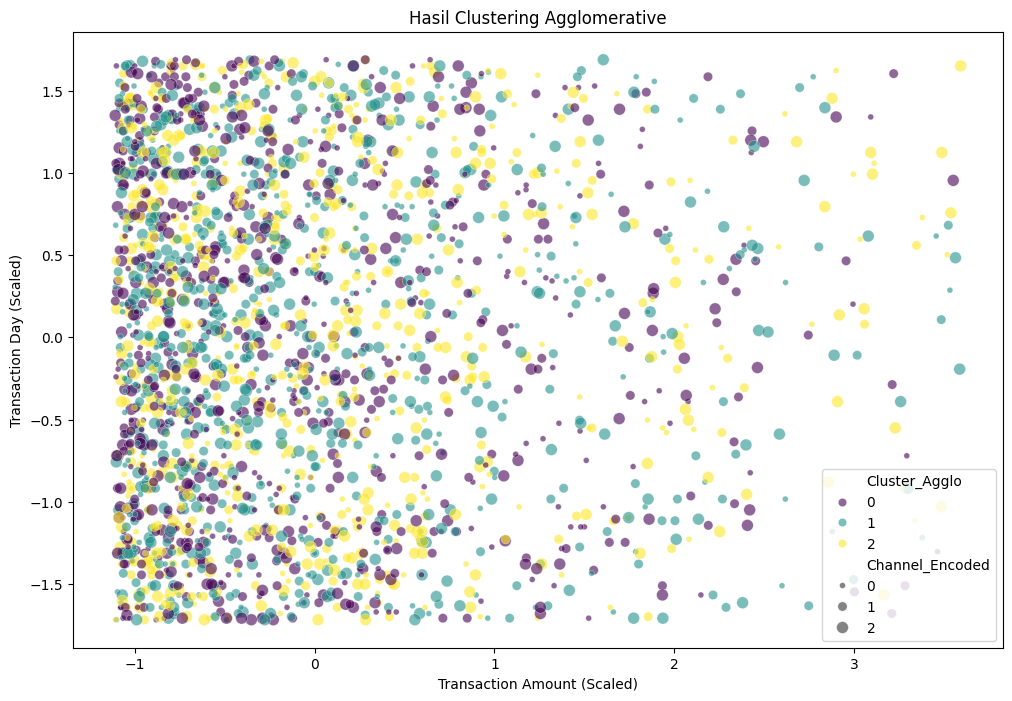

In [119]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TransactionAmount_Scaled', y='TransactionDay_Scaled', hue='Cluster_KMeans_Opt',
                size='Location_Encoded', data=df_copyan, palette='deep', alpha=0.6)
plt.title('Hasil Clustering KMeans Optimal')
plt.xlabel('Transaction Amount (Scaled)')
plt.ylabel('Transaction Day (Scaled)')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='TransactionAmount_Scaled', y='TransactionDay_Scaled', hue='Cluster_Agglo',
                size='Channel_Encoded', data=df_copyan, palette='viridis', alpha=0.6)
plt.title('Hasil Clustering Agglomerative')
plt.xlabel('Transaction Amount (Scaled)')
plt.ylabel('Transaction Day (Scaled)')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [120]:
# Inverse Transform
df_copyan['TransactionAmount'] = scaler.inverse_transform(df_copyan[['TransactionAmount_Scaled', 'TransactionDay_Scaled']])[:, 0]
df_copyan['TransactionDay'] = scaler.inverse_transform(df_copyan[['TransactionAmount_Scaled', 'TransactionDay_Scaled']])[:, 1]
df_copyan['Location'] = le_location.inverse_transform(df_copyan['Location_Encoded'])
df_copyan['Channel'] = le_channel.inverse_transform(df_copyan['Channel_Encoded'])
df_copyan['MerchantID'] = le_merchant.inverse_transform(df_copyan['Merchant_Encoded'])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [121]:
# Agregasi untuk KMeans Optimal
cluster_summary_kmeans = df_copyan.groupby('Cluster_KMeans_Opt').agg({
    'TransactionAmount': ['min', 'max', 'mean'],
    'TransactionDay': ['min', 'max', 'mean'],
    'Location': lambda x: x.mode()[0],
    'Channel': lambda x: x.mode()[0],
    'MerchantID': lambda x: x.mode()[0]
}).reset_index()

print("\nRingkasan Cluster KMeans Optimal:")
print(cluster_summary_kmeans)


Ringkasan Cluster KMeans Optimal:
  Cluster_KMeans_Opt TransactionAmount                      TransactionDay  \
                                   min      max        mean            min   
0                  0              0.32  1168.26  284.533025            1.0   
1                  1              0.26  1169.59  267.384390            1.0   

                          Location  Channel MerchantID  
     max        mean      <lambda> <lambda>   <lambda>  
0  363.0  185.209976        Austin   Branch       M026  
1  363.0  181.817363  Philadelphia   Branch       M065  


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans Optimal.

## Cluster 1:
- **Rata-rata TransactionAmount:** 284.53  
- **Rata-rata TransactionDay:** 185.21  
- **Location (Modus):** Austin  
- **Channel (Modus):** Branch  
- **MerchantID (Modus):** M026  
- **Analisis:** Cluster ini mencakup transaksi dengan jumlah rata-rata sedang (sekitar 284.53) yang terjadi di pertengahan tahun (rata-rata hari ke-185). Transaksi ini didominasi di lokasi Austin melalui kanal Branch dengan merchant utama M026. Pola ini menunjukkan aktivitas transaksi yang stabil di cabang toko di kota besar, kemungkinan mencerminkan pembelian rutin atau kebutuhan sehari-hari dengan nilai moderat.

## Cluster 2:
- **Rata-rata TransactionAmount:** 267.38  
- **Rata-rata TransactionDay:** 181.82  
- **Location (Modus):** Philadelphia  
- **Channel (Modus):** Branch  
- **MerchantID (Modus):** M065  
- **Analisis:** Cluster ini menunjukkan transaksi dengan jumlah rata-rata sedikit lebih rendah dari Cluster 1 (sekitar 267.38), juga terjadi di pertengahan tahun (rata-rata hari ke-182). Transaksi ini paling sering terjadi di Philadelphia melalui kanal Branch dengan merchant utama M065. Cluster ini mungkin mewakili pelanggan atau aktivitas transaksi yang serupa dengan Cluster 1 tetapi di lokasi geografis yang berbeda, dengan sedikit variasi dalam preferensi merchant.

In [122]:
# Agregasi untuk Agglomerative
cluster_summary_agglo = df_copyan.groupby('Cluster_Agglo').agg({
    'TransactionAmount': ['min', 'max', 'mean'],
    'TransactionDay': ['min', 'max', 'mean'],
    'Location': lambda x: x.mode()[0],
    'Channel': lambda x: x.mode()[0],
    'MerchantID': lambda x: x.mode()[0]
}).reset_index()

print("\nRingkasan Cluster Agglomerative:")
print(cluster_summary_agglo)




Ringkasan Cluster Agglomerative:
  Cluster_Agglo TransactionAmount                      TransactionDay         \
                              min      max        mean            min    max   
0             0              0.26  1159.39  261.582987            1.0  363.0   
1             1              0.32  1168.26  278.932123            1.0  363.0   
2             2              0.84  1169.59  288.829397            1.0  363.0   

                Location  Channel MerchantID  
         mean   <lambda> <lambda>   <lambda>  
0  182.191159  Charlotte   Branch       M091  
1  182.833144  Charlotte   Branch       M026  
2  185.851206      Miami      ATM       M042  


# Analisis Karakteristik Cluster dari Model AgglomerativeClustering

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model AgglomerativeClustering.

## Cluster 1:
- **Rata-rata TransactionAmount:** 261.58  
- **Rata-rata TransactionDay:** 182.19  
- **Location (Modus):** Charlotte  
- **Channel (Modus):** Branch  
- **MerchantID (Modus):** M091  
- **Analisis:** Cluster ini mencakup transaksi dengan jumlah rata-rata terendah di antara ketiga cluster (261.58), terjadi di pertengahan tahun (rata-rata hari ke-182, sekitar Juli). Transaksi ini didominasi di Charlotte melalui kanal Branch dengan merchant utama M091. Pola ini mungkin menunjukkan transaksi rutin dengan nilai relatif kecil di cabang fisik, kemungkinan mencerminkan pembelian kebutuhan dasar atau transaksi harian oleh pelanggan lokal.

## Cluster 2:
- **Rata-rata TransactionAmount:** 278.93  
- **Rata-rata TransactionDay:** 182.83  
- **Location (Modus):** Charlotte  
- **Channel (Modus):** Branch  
- **MerchantID (Modus):** M026  
- **Analisis:** Cluster ini menunjukkan transaksi dengan jumlah rata-rata sedang (278.93), juga terjadi di pertengahan tahun (rata-rata hari ke-183, sekitar Juli). Seperti Cluster 1, transaksi ini berpusat di Charlotte melalui kanal Branch, tetapi dengan merchant utama M026. Cluster ini mungkin mewakili segmen pelanggan yang sedikit lebih aktif bertransaksi dibandingkan Cluster 1, dengan preferensi merchant berbeda (M026 vs. M091), meskipun lokasi dan kanal tetap sama.

## Cluster 3:
- **Rata-rata TransactionAmount:** 288.83  
- **Rata-rata TransactionDay:** 185.85  
- **Location (Modus):** Miami  
- **Channel (Modus):** ATM  
- **MerchantID (Modus):** M042  
- **Analisis:** Cluster ini terdiri dari transaksi dengan jumlah rata-rata tertinggi (288.83), terjadi sedikit lebih akhir di pertengahan tahun (rata-rata hari ke-186, sekitar Juli). Berbeda dengan dua cluster sebelumnya, transaksi ini didominasi di Miami melalui kanal ATM dengan merchant utama M042. Pola ini bisa menunjukkan transaksi yang lebih besar dan lebih spontan (via ATM), mungkin mencerminkan kebiasaan penarikan tunai atau pembayaran langsung di lokasi yang lebih urban seperti Miami.


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [123]:
df_copyan.to_csv('hasil_clustering_submission_akhir.csv', index=False)
print("\n✅ Hasil clustering berhasil disimpan dalam file: hasil_clustering_submission_akhir.csv")


✅ Hasil clustering berhasil disimpan dalam file: hasil_clustering_submission_akhir.csv
